In [10]:
import numpy as np    
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
from astropy import constants as const
from astropy import units as u

In [12]:
#parent folder
pfolder = "/Users/pranavsatheesh/Triples/Github/"
import sys
sys.path.append(pfolder)


In [13]:
folder_name = pfolder + "Illustris_Data/"

In [29]:
Triples = pd.read_csv(folder_name+"strong_triples_data_from_ill.csv")
Triples.head()

,M1,M2,M3,qin,qout,t_triple_form,z_form,a_2nd_ovtks
0,2.119978e+07,3.473441e+06,2.463118e+07,0.163843,0.998296,1.352693e+09,4.507494,0.006986
1,2.391268e+08,1.296146e+08,1.287504e+07,0.542033,0.034916,5.596503e+09,1.083700,0.216358
2,2.122135e+08,1.477407e+08,6.859143e+06,0.696189,0.019056,1.100114e+10,0.229301,0.056611
3,8.239502e+07,5.113722e+07,4.296126e+06,0.620635,0.032173,1.303832e+10,0.053799,0.072537
4,4.625245e+07,8.973635e+06,2.419779e+06,0.194014,0.043816,3.438074e+09,1.932992,0.169430


In [150]:
Triples_HL = Triples[(Triples["qout"]<1)&(Triples["qin"]>0.1)&(Triples["qout"]>0.1)]

(array([ 4., 23., 47., 54., 56., 26., 18.,  9.,  1.,  4.]),
 array([6.58550567, 6.87032897, 7.15515227, 7.43997557, 7.72479887,
        8.00962216, 8.29444546, 8.57926876, 8.86409206, 9.14891536,
        9.43373865]),
 <BarContainer object of 10 artists>)

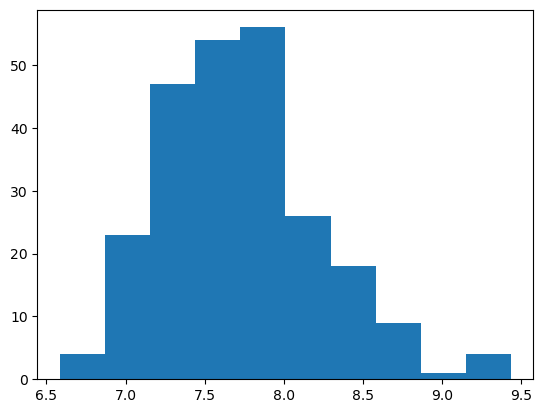

In [154]:
plt.hist(np.log10(Triples_HL["M1"]+Triples_HL["M2"]+Triples_HL["M3"]))

(array([  6.,  38.,  89., 114., 105.,  82.,  44.,  22.,  16.,   4.]),
 array([6.58550567, 6.91743058, 7.2493555 , 7.58128041, 7.91320532,
        8.24513023, 8.57705514, 8.90898005, 9.24090496, 9.57282987,
        9.90475478]),
 <BarContainer object of 10 artists>)

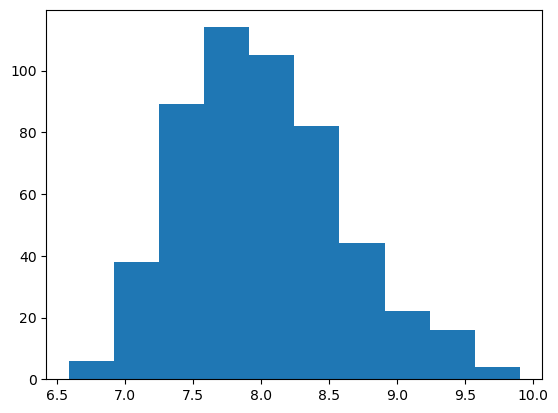

In [28]:
total = Triples["M1"] + Triples["M2"] + Triples["M3"] 
plt.hist(np.log10(total))

Text(0.5, 1.0, 'a_2nd_overtakes for all triples')

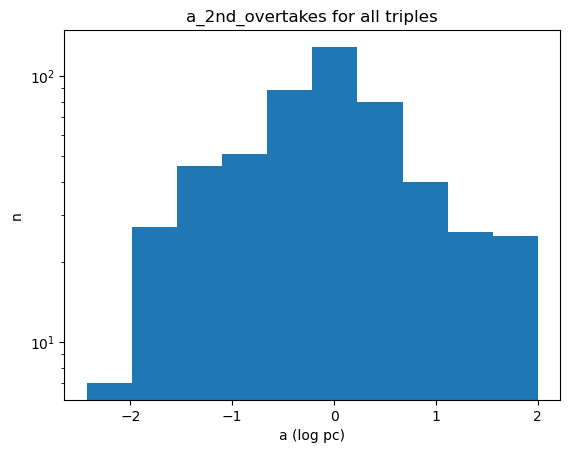

In [32]:
plt.hist(np.log10(Triples["a_2nd_ovtks"]))
plt.yscale("log")
plt.yscale("log")
plt.xlabel("a (log pc)")
plt.ylabel("n")
plt.title("a_2nd_overtakes for all triples")

In [103]:
a_triple = Triples["a_2nd_ovtks"].to_numpy()*u.pc
M1 = Triples["M1"].to_numpy()*u.M_sun
qout = Triples["qout"].to_numpy()
qin = Triples["qin"].to_numpy()

In [160]:
(1*u.M_sun).to(u.kg).value

1.988409870698051e+30

$$v_{sling} = \sqrt{\frac{f G M_1}{a} \frac{q_{in}}{q_{out} (1+q_{in}) (1+q_{out})}}$$

In [104]:
f=0.4
Vsling = np.sqrt(f*const.G * (M1.to(u.kg) * qin)/((a_triple).to(u.m) * qout * (1+qout) * (1+qin) )).to(u.km * u.s**-1)

2.4332564224559747
2.4338654247187996


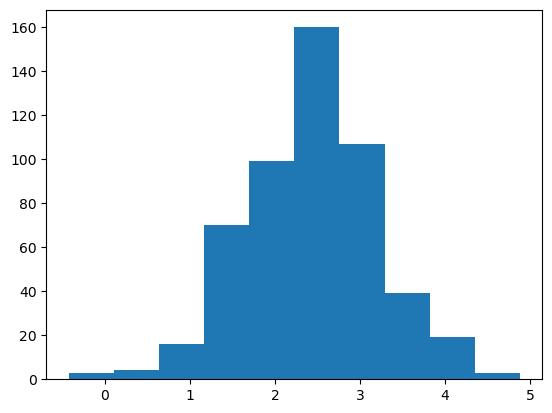

In [106]:
plt.hist(np.log10(Vsling.value))
print(np.mean(np.log10(Vsling.value)))
print(np.median(np.log10(Vsling.value)))

In [94]:
def a_hard(M1,qin):
    ahard = 0.80 * (4*qin)/(1+qin)**2 * ((M1.value*(1+qin))/10**8)**(1/2)
    ahard = ahard * 1 * u.pc 
    return ahard

In [95]:
ahards = a_hard(M1,qin) 

(array([  2.,   2.,   6.,  19.,  97., 185., 125.,  60.,  21.,   3.]),
 array([-2.12784358, -1.83625816, -1.54467273, -1.25308731, -0.96150189,
        -0.66991647, -0.37833104, -0.08674562,  0.2048398 ,  0.49642523,
         0.78801065]),
 <BarContainer object of 10 artists>)

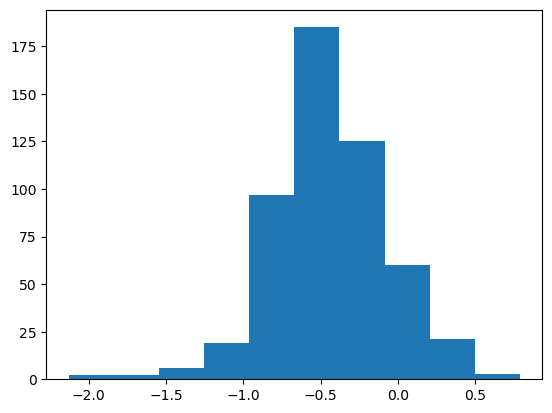

In [96]:
plt.hist(np.log10(ahards.value))

In [97]:
ahards[0]

<Quantity 0.19226602 pc>

In [98]:
f=0.4
Vsling = np.sqrt(f*const.G * (M1.to(u.kg) * qin)/(ahards.to(u.m) * qout * (1+qout) * (1+qin) )).to(u.km * u.s**-1)

2.601235163215561


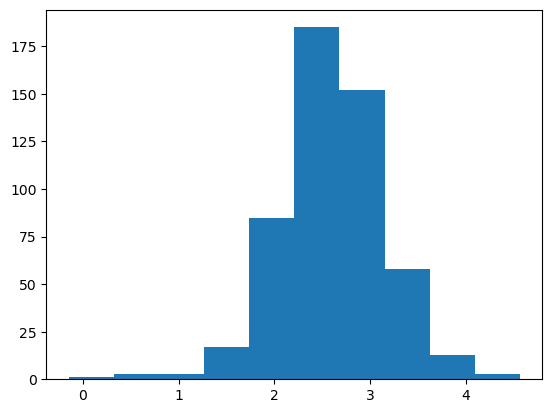

In [102]:
plt.hist(np.log10(Vsling.value))
print(np.median(np.log10(Vsling.value)))

In [112]:
Ntriple = len(M1)

In [110]:
ix_ahard = np.argwhere(ahards<a_triple)

In [138]:
print(len(ix_ahard)/Ntriple)

0.6269230769230769


In [128]:
Vsling = []
for i in range(Ntriple):
    
    if i in ix_ahard:
        atrip = ahards[i]
    else:
        atrip = a_triple[i]
    Vs = np.sqrt(f*const.G * (M1[i].to(u.kg) * qin[i])/(atrip.to(u.m) * qout[i] * (1+qout[i]) * (1+qin[i]) )).to(u.km * u.s**-1)
    Vsling.append(Vs.value)

2.723066666808836
4.880758381943968
2.682709327639733


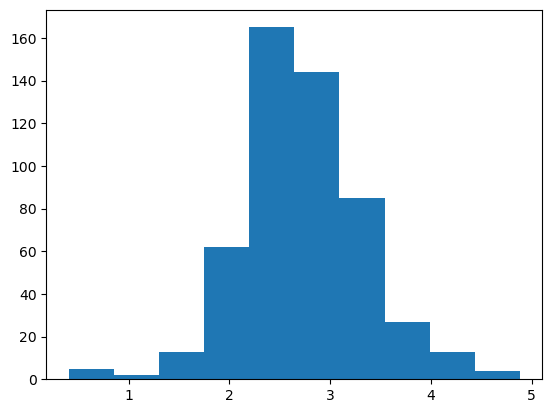

In [136]:
plt.hist(np.log10(Vsling))
print(np.mean(np.log10(Vsling)))
print(np.max(np.log10(Vsling)))
print(np.median(np.log10(Vsling)))